## Simple use case : Performing a CDS MOC query on a cone region

In [18]:
from astropy import coordinates
# mocserver object derived from astroquery.query.BaseQuery
from astroquery.cds import cds

We define a cone in astropy as the combinaison of a center position and a radius.

In [19]:
center = coordinates.SkyCoord(10.8, 32.2, unit='deg')
radius = coordinates.Angle(1.5, unit='deg')

The CDS MOC service aims at returning all the datasets which contain at least one source (i.e. spatial object) lying in the previously defined cone region.

For that purpose, we will can the query_region method of ``cds`` with the following parameters:

In [110]:
cds.query_region(region_type=cds.RegionType.Cone,
                 center=center,
                 radius=radius)
#cds.query_region(region_type=cds.RegionType.MOC,
#                 url='http://alasky.u-strasbg.fr/SDSS/DR9/color/Moc.fits')

['CDS/B/assocdata/obscore',
 'CDS/B/cb/lmxbdata',
 'CDS/B/cfht/cfht',
 'CDS/B/cfht/obscore',
 'CDS/B/chandra/chandra',
 'CDS/B/eso/eso_arc',
 'CDS/B/gcvs/gcvs_cat',
 'CDS/B/gcvs/nsv_cat',
 'CDS/B/gemini/obscore',
 'CDS/B/hst/hstlog',
 'CDS/B/hst/obscore',
 'CDS/B/hst/wfpc2',
 'CDS/B/jcmt/obscore',
 'CDS/B/merlin/merlin',
 'CDS/B/mk/mktypes',
 'CDS/B/pastel/pastel',
 'CDS/B/sb9/main',
 'CDS/B/sn/sncat',
 'CDS/B/subaru/suprimc',
 'CDS/B/swift/swiftlog',
 'CDS/B/vsx/vsx',
 'CDS/B/wd/catalog',
 'CDS/B/wds/wds',
 'CDS/B/xmm/xmmlog',
 'CDS/C/GALFAHI/Narrow',
 'CDS/C/HI4PI/HI',
 'CDS/I/100A/w10',
 'CDS/I/100A/w25',
 'CDS/I/100A/w50',
 'CDS/I/113A/catalog',
 'CDS/I/121/cpm',
 'CDS/I/122/bd',
 'CDS/I/131A/sao',
 'CDS/I/141/yale00',
 'CDS/I/143/fk4_1975',
 'CDS/I/144/hxcat',
 'CDS/I/146/ppm1',
 'CDS/I/147/table1',
 'CDS/I/154/f1',
 'CDS/I/16/catalog',
 'CDS/I/161/agk3r',
 'CDS/I/167/pmc86',
 'CDS/I/170A/table1',
 'CDS/I/171/acrs1',
 'CDS/I/172/irs',
 'CDS/I/175/fk5e',
 'CDS/I/176/catalog',
 'CDS

The ``region_type`` parameter is required. It informs the ``query_region`` method about what type of region we are querying the CDS MOC service and thus constraints the following parameters.

The possible type parameters and their sub parameters are listed here :

- cds.RegionType.Cone :
    * center : Skycoord
    * radius : Angle
- cds.RegionType.Polygon :
    * vertices : [Skycoord]
- cds.RegionType.Moc : either
    * filename : str (the local path to a fits file containing the MOC)
    * url : str (an url to a fits file)
    * moc : mocpy.MOC object

An optional ``intersect`` parameter specifies the selection heuristic of the data sets. This parameter can take only three different values :
- ``overlaps`` (default). The matching data sets are those overlaping the MOC region.
- ``covers``. The matching data sets are those covering the MOC region.
- ``enclosed``. The matching data sets are those enclosing the MOC region.


## Choice between multiple output formats

An optional ``output_format`` parameter allows the user to specify the format of the query response. ``format`` must have a value among:

- cds.ReturnFormat.id (default). The output is a ID list of the matched data sets
- cds.ReturnFormat.record. The output is a dictionary of cds.Dataset.dataset objects indexed by their ID
- cds.ReturnFormat.number. query_region returns the matching data sets number
- cds.ReturnFormat.moc. The output is a mocpy.MOC object corresponding to the union of the MOCs of the matched data sets
- cds.ReturnFormat.i_moc. The output is a mocpy.MOC object corresponding to the intersection of the MOCs of the matched data sets

Getting the data sets records is done like the following:

In [33]:
datasets_d = cds.query_region(region_type=cds.RegionType.Cone,
                              center=center,
                              radius=radius,
                              output_format=cds.ReturnFormat.record)
datasets_d

{'CDS/J/A+A/467/585/table1': <astroquery.cds.dataset.Dataset at 0x7f889ab14a58>,
 'CDS/I/259/suppl_1': <astroquery.cds.dataset.Dataset at 0x7f889ab770b8>,
 'CDS/I/346/fs': <astroquery.cds.dataset.Dataset at 0x7f889ab7c2e8>,
 'CDS/II/249/catalog': <astroquery.cds.dataset.Dataset at 0x7f889ab81438>,
 'CDS/J/AJ/113/22/table2': <astroquery.cds.dataset.Dataset at 0x7f889ab23a58>,
 'CDS/J/AJ/138/1938/table4': <astroquery.cds.dataset.Dataset at 0x7f889ab28978>,
 'CDS/J/AJ/151/41/movers': <astroquery.cds.dataset.Dataset at 0x7f889ab2d7b8>,
 'CDS/VI/135/table15': <astroquery.cds.dataset.Dataset at 0x7f889aaedb70>,
 'CDS/P/Umbriel/Voyager': <astroquery.cds.dataset.Dataset at 0x7f889aae82b0>,
 'ov-gso/P/VTSS/CONT': <astroquery.cds.dataset.Dataset at 0x7f889ab066a0>,
 'CDS/IX/46/summary': <astroquery.cds.dataset.Dataset at 0x7f889ab106d8>,
 'CDS/J/AJ/121/2843/table1': <astroquery.cds.dataset.Dataset at 0x7f889ab23cf8>,
 'CDS/J/MNRAS/454/2787/table3': <astroquery.cds.dataset.Dataset at 0x7f889aad52

To get the meta-datas of a dataset, say `CDS/I/200/npm1rgal`, just do the following :

In [30]:
# List all the meta data associated to a dataset
datasets_d['CDS/I/200/npm1rgal'].properties

{'ID': 'CDS/I/200/npm1rgal',
 'TIMESTAMP': 1530172646000.0,
 'bib_reference': '1987AJ.....94..501K',
 'cs_service_url': 'http://vizier.u-strasbg.fr/viz-bin/votable/-A?-source=I%2F200%2Fnpm1rgal&',
 'data_ucd': ['pos.eq.ra', 'pos.eq.dec', 'phot.mag;em.opt.B', 'meta.id'],
 'dataproduct_type': 'catalog',
 'moc_access_url': 'http://alasky.unistra.fr/footprints/tables/vizier/I_200_npm1rgal/MOC?nside=2048',
 'moc_order': 11.0,
 'moc_sky_fraction': 0.0009963,
 'nb_rows': 50517.0,
 'obs_astronomy_kw': ['Positional_Data', 'Galaxies'],
 'obs_collection': 'NPM1',
 'obs_collection_label': 'NPM1',
 'obs_copyright_url': 'http://cdsarc.u-strasbg.fr/viz-bin/Cat?I%2F200',
 'obs_description': 'The Catalogue',
 'obs_description_url': 'http://cdsarc.u-strasbg.fr/viz-bin/Cat?I%2F200',
 'obs_id': 'I/200/npm1rgal',
 'obs_initial_dec': 1.7907846593289463,
 'obs_initial_fov': 0.028629053431811713,
 'obs_initial_ra': 46.42822265624999,
 'obs_label': 'npm1rgal',
 'obs_regime': 'Optical',
 'obs_release_date': '20

* Get the MOC

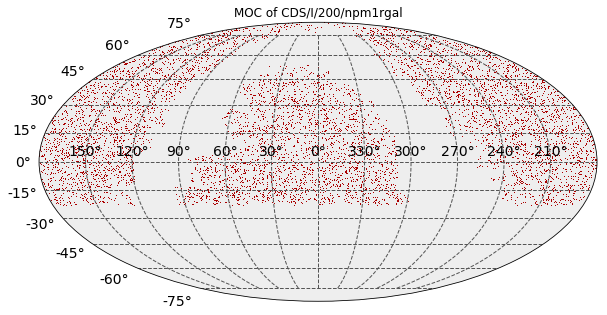

In [121]:
from mocpy import MOC

moc_access_url = datasets_d['CDS/I/200/npm1rgal'].properties['moc_access_url']
npm1rgal_moc = MOC.from_url(moc_access_url)
# and plot it
npm1rgal_moc.plot(title="MOC of CDS/I/200/npm1rgal")

* Get the available services and query them with PyVO

In [116]:
# List the services available on it
datasets_d['CDS/I/200/npm1rgal'].services

['cs']

cds.Dataset.dataset objects allows you to query a specific service (if available for this data set) such as the tap service, the cone search service...

For ``CDS/I/200/npm1rgal`` we can see that the meta-data 'cs_service_url' is available. Thus, it can be possible to query the cone search service on this dataset specifying the center position and the radius of the cone. If all is doing great, we will get an astropy.table.Table containing all the ``CDS/I/200/npm1rgal`` observations located in this cone.

Let's do this:

In [104]:
votable = datasets_d['CDS/I/200/npm1rgal'].search(cds.ServiceType.cs, pos=(20.1, 32.2), radius=3)
# get the first table from the votable file and convert it to an astropy.table.Table instance
table = votable.get_first_table().to_table()
table

_RAJ2000,_DEJ2000,_r,Name,RAB1950,DEB1950,bmag,Nfields,Flag1,Flag2,Flag3,_RA.icrs,_DE.icrs
deg,deg,deg,,"""h:m:s""","""d:m:s""",mag,,,,,"""h:m:s""","""d:m:s"""
float64,float64,float64,bytes8,bytes12,bytes12,float32,uint8,uint8,uint8,uint8,bytes12,bytes12
19.42227403,29.58209057,2.681714,+29.0049,01 14 55.259,+29 19 08.45,16.87,1,0,0,0,01 17 41.346,+29 34 55.53
20.30608353,29.65737445,2.548765,+29.0052,01 18 26.786,+29 23 44.63,16.96,1,0,0,0,01 21 13.460,+29 39 26.55
18.35965298,29.76985557,2.851484,+29.0047,01 10 40.803,+29 30 18.50,16.58,2,0,0,0,01 13 26.317,+29 46 11.48
22.03352749,29.77585062,2.936517,+29.0056,01 25 20.240,+29 31 01.87,16.61,1,0,0,0,01 28 08.047,+29 46 33.06
22.26040401,29.92633082,2.931428,+29.0058,01 26 14.464,+29 40 05.07,16.62,1,0,0,0,01 29 02.497,+29 55 34.79
21.90486779,30.06271694,2.637082,+29.0055,01 24 49.278,+29 48 13.76,16.78,1,0,0,0,01 27 37.168,+30 03 45.78
17.85478798,30.11134458,2.837816,+29.0045,01 08 39.795,+29 50 45.17,15.75,2,0,0,0,01 11 25.149,+30 06 40.84
20.69910978,30.15202863,2.111134,+29.0053,01 20 00.603,+29 53 27.75,16.96,1,0,0,0,01 22 47.786,+30 09 07.30


In [49]:
type(table)

astropy.table.table.Table

## Filtering the datasets on their meta datas

In [105]:
moc = cds.query_region(region_type=cds.RegionType.AllSky,
                      meta_data="ID=xcatdb* &! obs_*=*CONSTEL*",
                      output_format=cds.ReturnFormat.moc,
                      moc_order=7)

In [106]:
type(moc)

mocpy.moc.MOC

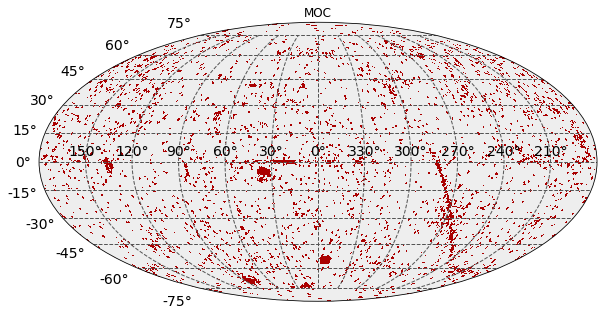

In [107]:
moc.plot()